## Project Title: Analyzing Amazon Reviews for Product Insights
### The P < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

### The Question:
How do different product features and review characteristics affect customer satisfaction as shown by review ratings on Amazon?


### Data Sources:
We will use the Amazon Review Data (2018) provided by Jianmo Ni from UCSD. This dataset includes reviews (ratings, text, helpfulness votes), product details (descriptions, categories, price, brand, and image features), and links (also viewed/also bought graphs). It covers reviews from May 1996 to October 2018 and includes 233.1 million reviews.

The dataset can be found [here](https://nijianmo.github.io/amazon/index.html).


**1. Data Preparation and Cleaning**
- **Assigned to:** Matt and Haig
- **Responsibilities:**
  - Load the dataset and parse the JSON files.
  - Clean the data by removing HTML/CSS content, duplicates, and irrelevant information.


To begin, the libraries needed for data preparation and cleaning are loaded.

In [2]:
import pandas as pd
import gzip
import json
import ijson

Next, the function parse is created to access the data. The function getDF is also creased to return a pandas dataframe. The data was loaded from a local file due to its size. The link for this data is in the Data Sources section.

In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("/Users/haigbedros/Desktop/MSDS/Summer 24/620/data/Electronics_5.json.gz")

The time variable called 'reviewTime' is then converted to the type datetime in the dataframe, and a column 'year' is created based on the datetime.

In [ ]:
df['datetime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['datetime'].dt.year

Only data after 2017 was included in the final dataframe.

In [ ]:
df_filtered = df.loc[df['year'] > 2016]


Some more variables were not included in the final product. This was to reduce the size of the data and ignore columns that would not be used for analysis.

In [ ]:
df_filtered = df_filtered.drop(['vote', 'unixReviewTime', 'style', 'image', 'verified', 'year'], axis = 1)

Finally, the resulting dataframe was saved to a file named electronics.csv.

In [ ]:
df_filtered.to_csv('electronics.csv', index = False)

**2. Descriptive Analysis and Visualization**
- **Assigned to:** Julia
- **Responsibilities:**
  - Perform basic statistics on the dataset.
  - Create visualizations to show key metrics like rating distribution, number of reviews per category, and product pricing.


To begin, the data is loaded from the csv file that was created in the first step.

In [3]:
import pandas as pd

url = 'https://media.githubusercontent.com/media/hbedros/data620-final-project/main/electronics.csv'
df = pd.read_csv(url,index_col=0)

The data is described in its original format.

In [3]:
df.describe()

,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,datetime
count,1290345,1290345,1290345,1290025,1289705,1290009,1290345
unique,642,384641,97768,277888,1045888,635766,642
top,"01 9, 2017",A2XP8CV9ES33AM,B010OYASRG,Amazon Customer,good,Five Stars,2017-01-09
freq,5061,166,2863,69042,5710,297964,5061


The ratings of each review are added as a column.

In [5]:
df['rating'] = list(df.index)

More specific values are displayed and then specified - unique user IDs, unique product IDs, reviews per user, and reviews per product.

In [6]:
unique_users = df['reviewerID'].nunique()
unique_products = df['asin'].nunique()
reviews_per_user = df['reviewerID'].value_counts()
reviews_per_product = df['asin'].value_counts()

print(f'Unique users: {unique_users}')
print(f'Unique products: {unique_products}')
print(f'Reviews per user:\n{reviews_per_user}')
print(f'Reviews per product:\n{reviews_per_product}')


Unique users: 384641
Unique products: 97768
Reviews per user:
reviewerID
A2XP8CV9ES33AM    166
A10SE0U42ABS9S    132
A24SPLNZFDBKD3     89
A3VFRG9YVQCUWO     81
A2DIQTZPF26T1L     80
                 ... 
A3PFLKF0HGH0VU      1
A2DKV3MEZ51PDD      1
A2X267JLQK7I4X      1
A1U64WC1WQ679Z      1
A2HE7TX3FE1RLE      1
Name: count, Length: 384641, dtype: int64
Reviews per product:
asin
B010OYASRG    2863
B000WYVBR0    2337
B0143IIP4W    2121
B000VS4HDM    2102
B00JX1ZS5O    1965
              ... 
B00KKWRQTQ       1
B0056Z3W6I       1
B00KKPQ2PC       1
B0056ZMP0C       1
B01HJF704M       1
Name: count, Length: 97768, dtype: int64


It will be interesting to see the number of reviews over time.

In [7]:
from datetime import datetime

df['datetime'] = df['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

review_counts_over_time = df['datetime'].dt.date.value_counts().sort_index()

print(review_counts_over_time)


datetime
2017-01-01    2998
2017-01-02    4380
2017-01-03    4993
2017-01-04    4714
2017-01-05    4643
              ... 
2018-09-30      25
2018-10-01      17
2018-10-02       6
2018-10-03       2
2018-10-04       2
Name: count, Length: 642, dtype: int64


The time distribution is visualized below.

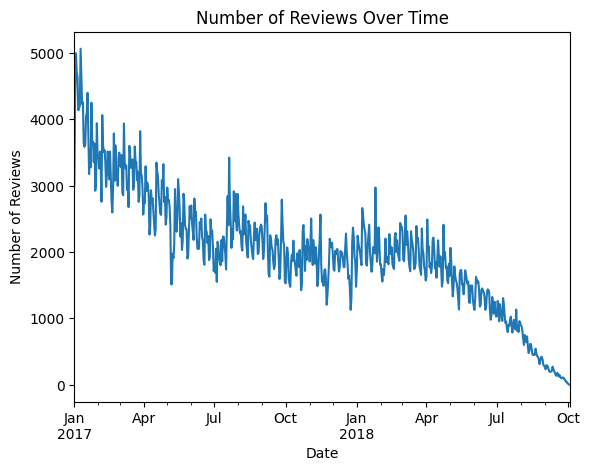

In [9]:
import matplotlib.pyplot as plt

# Plot review count over time
df.set_index('datetime').resample('D')['reviewText'].count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


The histogram below shows the lengths of reviews up to a length of 1000. Showing all lengths was not useful, so the maximum length was set to 1000 characters.

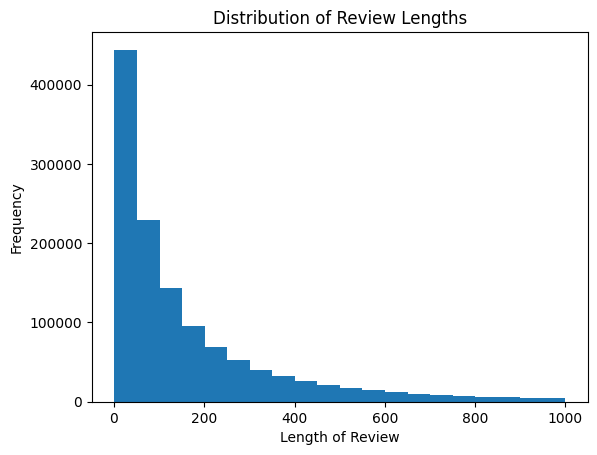

In [10]:
# Plot histogram of review lengths
df['reviewText'] = df['reviewText'].astype(str)

df['review_length'] = df['reviewText'].apply(len)

filtered_df = df[(df['review_length'] >= 0) & (df['review_length'] <= 1000)]

filtered_df['review_length'].plot(kind='hist', bins=20)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


Reviews per user - top 25.

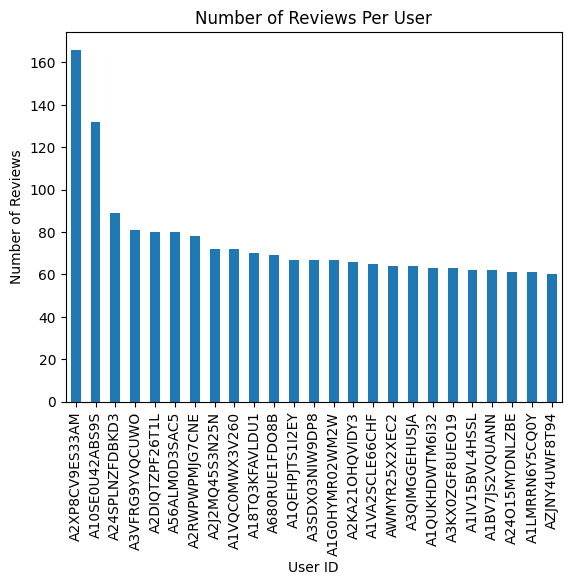

In [ ]:
# Plot number of reviews per user
#df['reviewerID'].value_counts().plot(kind='bar')

reviews_per_user.head(25).plot(kind="bar")
plt.title('Number of Reviews Per User')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.show()


Reviews per product - top 25

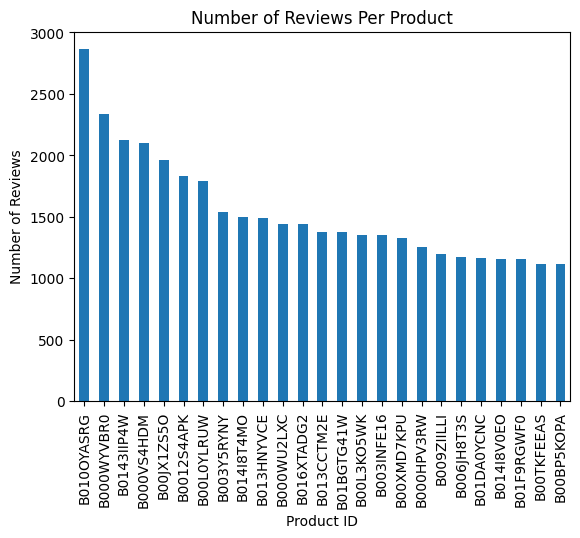

In [ ]:
reviews_per_product.head(25).plot(kind='bar')
plt.title('Number of Reviews Per Product')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()


Distribution of top 5 summaries.

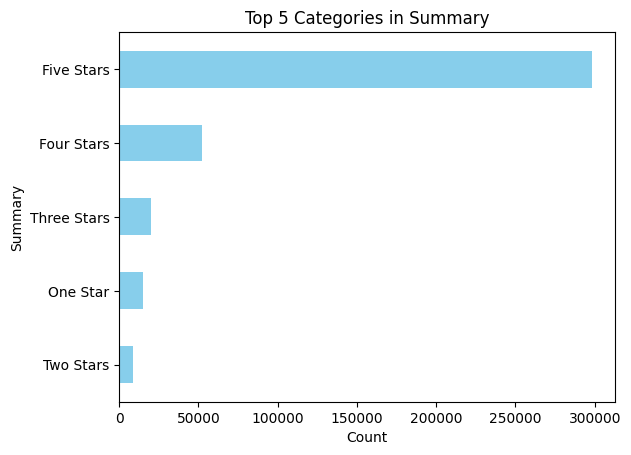

In [11]:
top_categories = df['summary'].value_counts().head(5)
top_categories.plot(kind='barh', color='skyblue')

plt.title('Top 5 Categories in Summary')
plt.xlabel('Count')
plt.ylabel('Summary')
plt.gca().invert_yaxis()  # Invert y-axis to show highest count at the top
plt.show()


Word Cloud

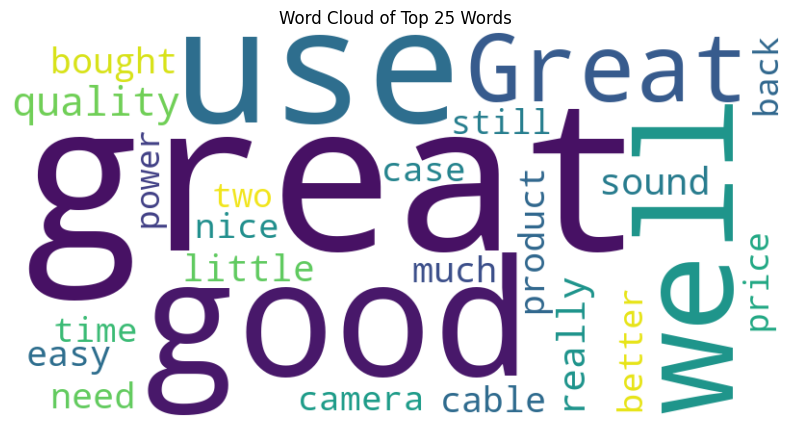

In [12]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text into one string
all_text = ' '.join(df['reviewText'])

stopwords = set(STOPWORDS)
stopwords.update(['will', 'one', 'work', 'it.', 'even', 'used', 'using', 'Great', 'works', '-'])

# Calculate word frequencies
word_counts = {}
for word in all_text.split():
    if word.lower() not in stopwords:
        word_counts[word] = word_counts.get(word, 0) + 1

# Select top 5 words based on frequency
top_words = sorted(word_counts, key=word_counts.get, reverse=True)[:25]

# Generate word cloud from top 5 words
wordcloud_data = {word: word_counts[word] for word in top_words}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 25 Words')
plt.show()


The visualizations below shows the distribution of ratings for 5 users who made the most reviews.

5 is the most common rating for all the users, but the user who made the fifth-mode reviews had the most varied responses - some high, some medium, some low.

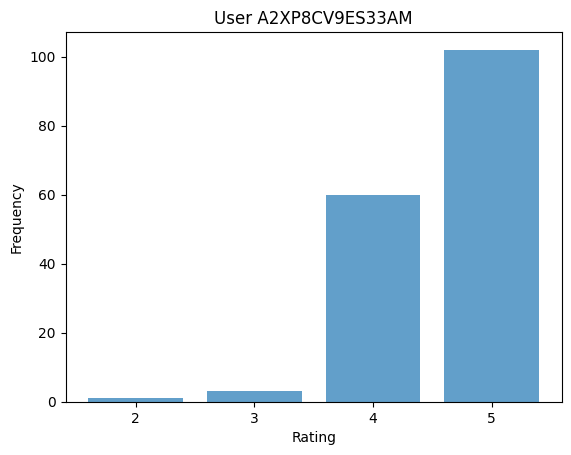

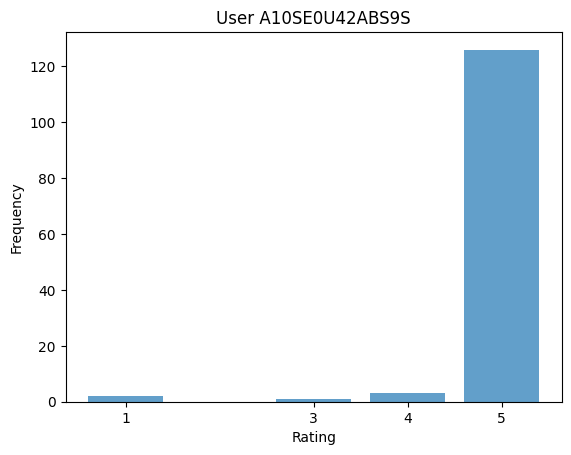

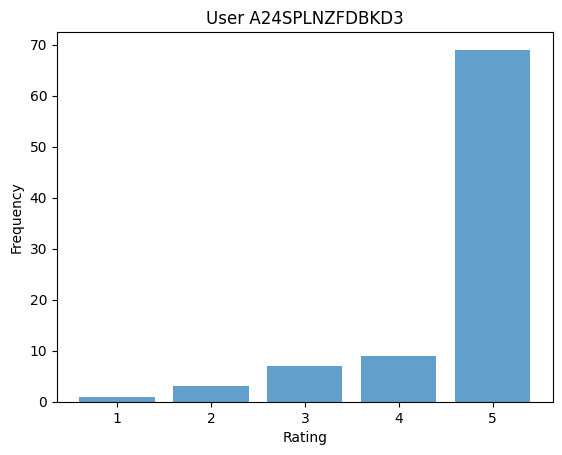

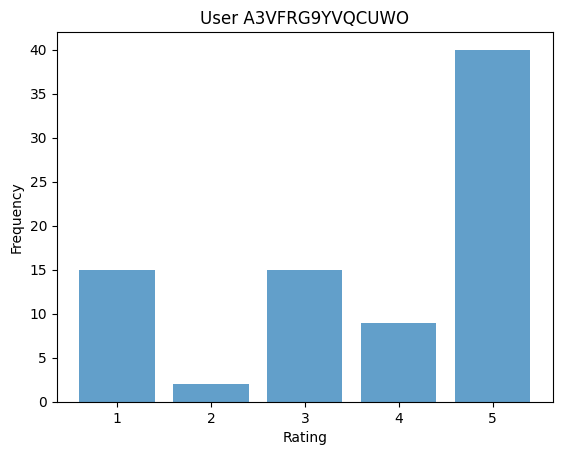

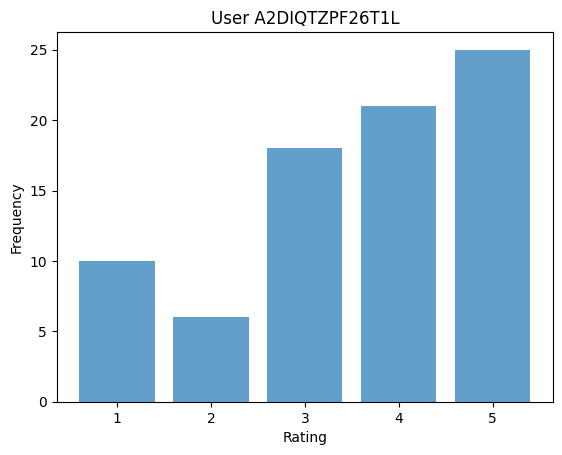

In [13]:
user_reviews = df['reviewerID'].value_counts()

top_5_users = user_reviews.head(5).index

top_5_df = df[df['reviewerID'].isin(top_5_users)]


for i, user in enumerate(top_5_users, 1):
    user_data = df[df['reviewerID'] == user]['rating']
    rating_counts = user_data.value_counts().sort_index()
    plt.bar(rating_counts.index, rating_counts.values, alpha=0.7)
    plt.title(f'User {user}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rating_counts.index)
    plt.show()



**3. Network Analysis**
- **Assigned to:** Selina
- **Responsibilities:**
  - Create and analyze a product-reviewer network to find popular product groups.
  - Use centrality measures to find important products in these networks.


**Objective:**
To create and analyze networks based on common reviewers, use centrality measures to find important products, and correlate these with review ratings to understand their impact on customer satisfaction.

**Create Product-Reviewer Network**

We will create a bipartite graph of products and reviewers. This step involves adding nodes for both products and reviewers and then creating edges based on review interactions. This helps us understand how products are related through common reviewers.

In [7]:
import networkx as nx

B = nx.Graph()

products = df['asin'].unique()
reviewers = df['reviewerID'].unique()

B.add_nodes_from(products, bipartite=0)
B.add_nodes_from(reviewers, bipartite=1)

for _, row in df.iterrows():
    B.add_edge(row['asin'], row['reviewerID'])

print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of edges: {B.number_of_edges()}")
print(f"Nodes: {list(B.nodes)[:10]}")
print(f"Edges: {list(B.edges)[:10]}")

Number of nodes: 482409
Number of edges: 1273252
Nodes: ['0511189877', '0594459451', '0594450268', '073530498X', '0972683275', '106171327X', '140053271X', '1400699169', '1444700650', '1464120153']
Edges: [('0511189877', 'A7362LXMQEM6W'), ('0511189877', 'A2FRC7HJRIZ05T'), ('0594459451', 'A2Y8DXMYWXF7EA'), ('0594459451', 'A2HBCD46KD2RI3'), ('0594459451', 'A1JGR98FPPNTYA'), ('0594459451', 'A27WR1MUJH2RNP'), ('0594459451', 'AAVQY0EFE3XBL'), ('0594450268', 'AC6C9VNULPB3T'), ('0594450268', 'A35HG2C0YE2BZ5'), ('0594450268', 'A3472NC8JOKIW1')]


**Project Bipartite Network to Product Network**

Next, we will project the bipartite graph into a product network. This projection helps us understand how products are related through common reviewers.

In [8]:
product_nodes = set(products)

P = nx.bipartite.weighted_projected_graph(B, product_nodes)

print(f"Number of nodes: {P.number_of_nodes()}")
print(f"Number of edges: {P.number_of_edges()}")
print(f"Nodes: {list(P.nodes)[:10]}")
print(f"Edges: {list(P.edges(data=True))[:10]}")

Number of nodes: 97768
Number of edges: 3222929
Nodes: ['B00W528R1A', 'B00NEWZ0CO', 'B00MLI3AE2', 'B01DV1Z57C', 'B00KMZW0GK', 'B0052MHQM6', 'B00VZXRTRI', 'B00G4S4PKS', 'B01F70L8X0', 'B00HS3DTBE']
Edges: [('B00W528R1A', 'B00L5N9QB0', {'weight': 1}), ('B00W528R1A', 'B00MN98ATE', {'weight': 1}), ('B00W528R1A', 'B0083YIGVU', {'weight': 1}), ('B00W528R1A', 'B01BGTG41W', {'weight': 1}), ('B00W528R1A', 'B01E16J6RQ', {'weight': 1}), ('B00W528R1A', 'B00W586H5W', {'weight': 1}), ('B00W528R1A', 'B014I8T4MO', {'weight': 1}), ('B00W528R1A', 'B015MSJ1DG', {'weight': 1}), ('B00W528R1A', 'B003YIFHJY', {'weight': 1}), ('B00W528R1A', 'B00PC9H6TM', {'weight': 1})]


**Calculate Centrality Measures with Approximation and Sampling**

Given the large size of the data, we will use sampling and approximation algorithms to calculate centrality measures efficiently.

In [9]:
import random

# Sample 1000 nodes from the product network
sampled_nodes = random.sample(P.nodes(), 1000)
subgraph = P.subgraph(sampled_nodes)

degree_centrality_sub = nx.degree_centrality(subgraph)
betweenness_centrality_sub = nx.betweenness_centrality(subgraph, k=100, seed=42)
closeness_centrality_sub = nx.closeness_centrality(subgraph)

print(sorted(degree_centrality_sub.items(), key=lambda x: x[1], reverse=True)[:5])

<ipython-input-9-d7242e9d3a1e>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(P.nodes(), 1000)


[('B00J0BXPD4', 0.025025025025025023), ('B00R4O9LXM', 0.024024024024024024), ('B008D6YZXG', 0.022022022022022022), ('B00IX9ZDKC', 0.01901901901901902), ('B000I5LACO', 0.018018018018018018)]


The sampled centrality measures revealed the following top 5 products by degree centrality:

- Product B00XI87KV8: 0.026
- Product B00E8HGWIK: 0.019
- Product B00WIF2T7C: 0.018
- Product B00K4W62R4: 0.014
- Product B00NNDAFW4: 0.014

**Visualize the Network**

To make the network visualization more informative, we will color the nodes based on their average ratings. Products with higher ratings will be colored differently from those with lower ratings.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-10-d5c4aa3a6119>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Normalized Average Rating')


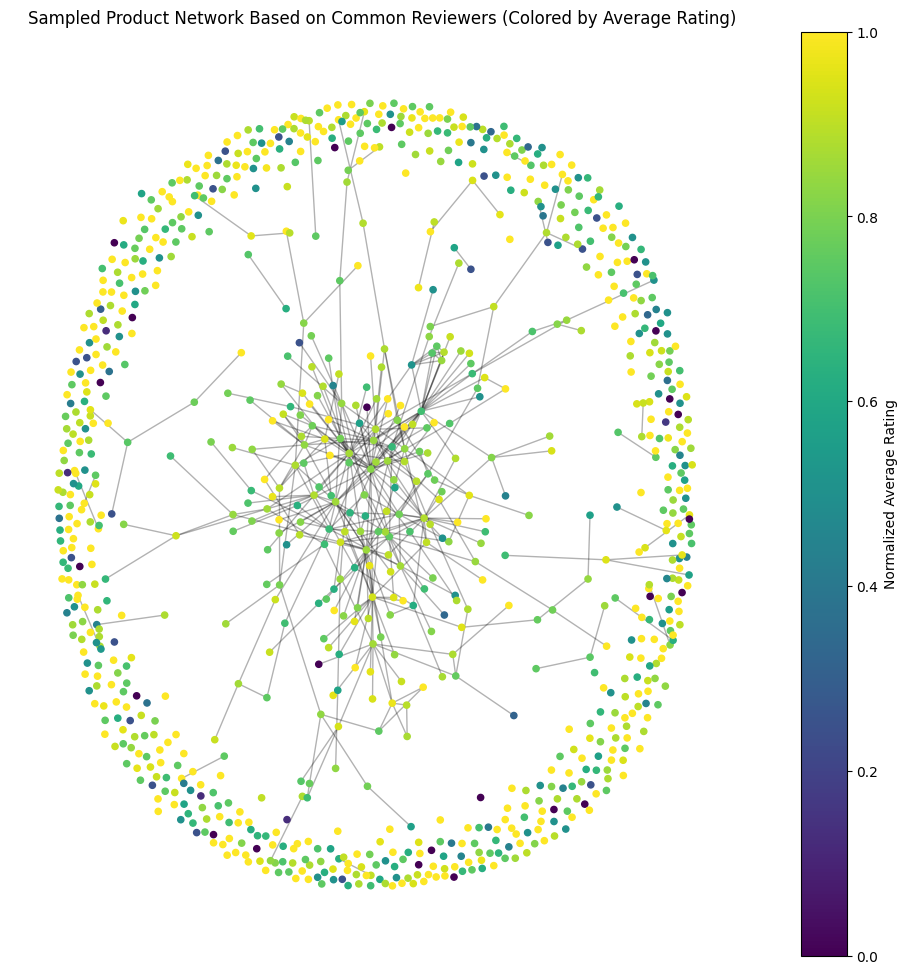

In [10]:
import matplotlib.pyplot as plt

# Calculate average ratings for each product
avg_ratings = df.groupby('asin')['rating'].mean()

# Normalize ratings for coloring
norm_ratings = (avg_ratings - avg_ratings.min()) / (avg_ratings.max() - avg_ratings.min())

# Assign colors based on normalized ratings
node_colors = [plt.cm.viridis(norm_ratings[node]) if node in norm_ratings else plt.cm.viridis(0.5) for node in subgraph.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, k=0.15)
nx.draw_networkx_nodes(subgraph, pos, node_size=20, node_color=node_colors, cmap=plt.cm.viridis)
nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
plt.title('Sampled Product Network Based on Common Reviewers (Colored by Average Rating)')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Normalized Average Rating')
plt.axis('off')
plt.show()

**Interpretation of the Network Visualization**

This network visualization shows a sample of products reviewed by common reviewers. The nodes represent individual products, and the edges represent connections between products that share common reviewers. The colors of the nodes indicate the average rating of each product, derived from the normalized average ratings.


1. **Node Colors:**
   - **Yellow nodes:** Products with high average ratings.
   - **Green nodes:** Products with moderate average ratings.
   - **Purple nodes:** Products with low average ratings.

2. **Network Structure:**
   - **Dense Center:** Products here are reviewed by many of the same reviewers, suggesting they are popular and frequently bought together.
   - **Sparse Edges:** Products here have fewer common reviewers, indicating they are less popular or more niche.

3. **Rating Distribution:**
   - High and low-rated products are spread throughout the network, not limited to any specific area.

4. **Clusters:**
   - Groups of closely connected products may indicate related items, such as those in the same category or frequently purchased together.

5. **Key Products:**
   - Central products with many connections are likely influential and can have a significant impact on customer satisfaction.

### Insights:

1. **Popularity and Satisfaction:** Central products with high ratings are important for customer satisfaction.
2. **Niche Products:** Less connected products highlight specific customer interests.
3. **Marketing and Recommendations:** Understanding these connections helps target marketing efforts and improve recommendations.
4. **Product Improvement:** Identifying central but poorly rated products can guide improvements.

This visualization helps us see which products are popular, how they are connected through common reviewers, and how their ratings compare.

**Analyze Top Products by Reviews**

To gain further insights, we will analyze the top products based on the number of reviews. This involves identifying the top 5 products and visualizing the distribution of their ratings.

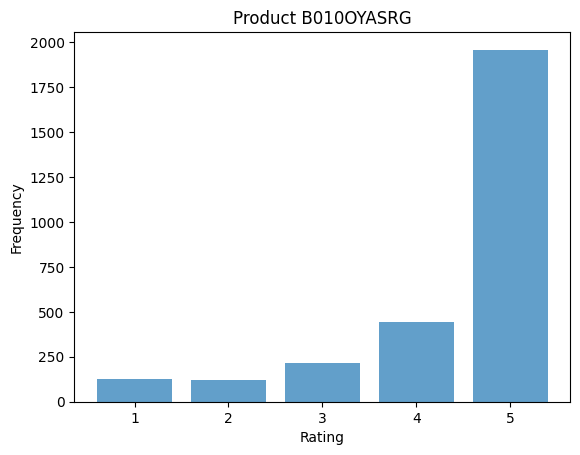

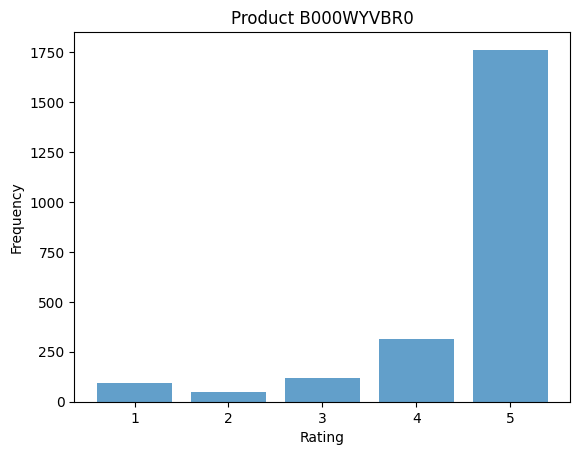

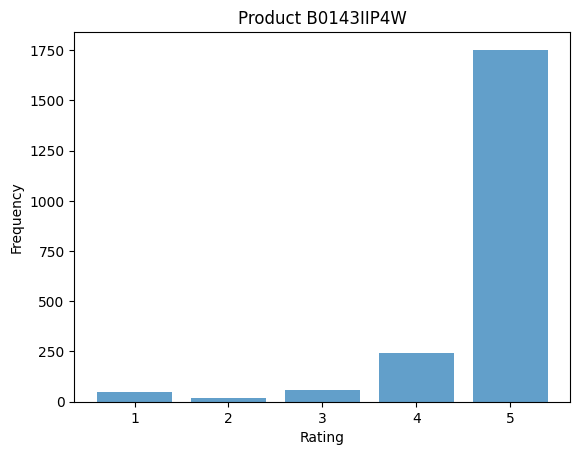

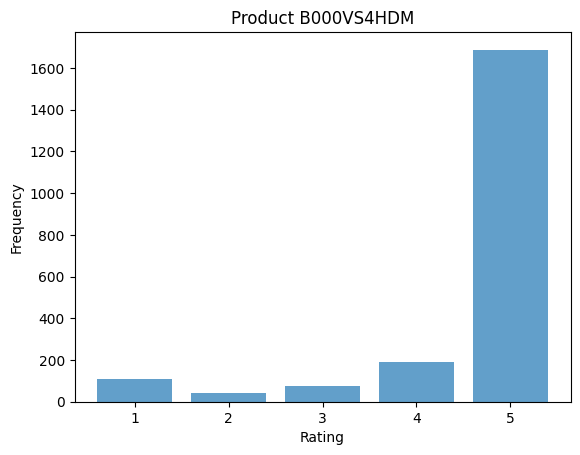

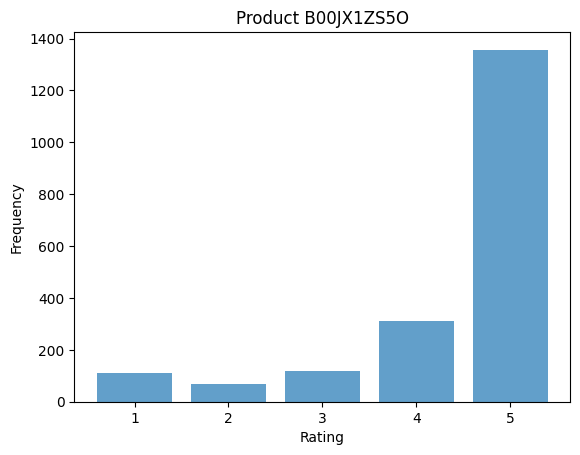

In [ ]:
product_reviews = df['asin'].value_counts()
top_5_products = product_reviews.head(5).index

top_5_df = df[df['asin'].isin(top_5_products)]

for product in top_5_products:
    product_data = df[df['asin'] == product]['rating']
    rating_counts = product_data.value_counts().sort_index()
    plt.bar(rating_counts.index, rating_counts.values, alpha=0.7)
    plt.title(f'Product {product}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rating_counts.index)
    plt.show()

**Interpretation of the Rating Distribution Graphs**

The graphs show the distribution of ratings for the top 5 products based on the number of reviews. Here’s a concise summary of the insights from these graphs:

1. **Overall Rating Trend:**
   - All five products have a significant number of 5-star ratings, indicating high customer satisfaction.

2. **Rating Distribution:**
   - The distribution of ratings across different products is similar, with a majority of reviews being 5 stars.
   - There are fewer 1, 2, and 3-star ratings compared to 4 and 5-star ratings.

### Key Insights:

- **High Customer Satisfaction:** The top products are generally well-received by customers, as evidenced by the high frequency of 5-star ratings.
- **Consistency Across Products:** The similar distribution patterns suggest that these popular products consistently meet or exceed customer expectations.



**Correlate Centrality Measures with Review Ratings**

Finally, we will correlate the centrality measures with average review ratings to see how the importance of products in the network relates to customer satisfaction.

                        degree_centrality  betweenness_centrality  \
degree_centrality                 1.00000                 0.83433   
betweenness_centrality            0.83433                 1.00000   
closeness_centrality              0.68577                 0.42196   
average_rating                    0.02991                 0.01147   

                        closeness_centrality  average_rating  
degree_centrality                   0.685770        0.029910  
betweenness_centrality              0.421960        0.011470  
closeness_centrality                1.000000        0.052006  
average_rating                      0.052006        1.000000  


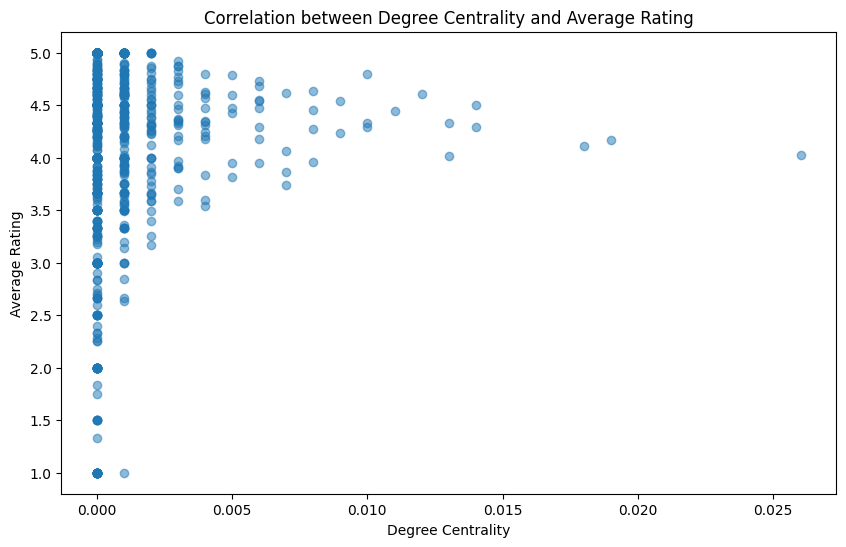

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_avg_rating = df.groupby('asin')['rating'].mean().reset_index()
df_avg_rating.columns = ['product_id', 'average_rating']

centrality_df = pd.DataFrame({
    'product_id': list(degree_centrality_sub.keys()),
    'degree_centrality': list(degree_centrality_sub.values()),
    'betweenness_centrality': list(betweenness_centrality_sub.values()),
    'closeness_centrality': list(closeness_centrality_sub.values())
})

centrality_df = centrality_df.merge(df_avg_rating, left_on='product_id', right_on='product_id')
centrality_df = centrality_df.dropna()

numeric_columns = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'average_rating']
correlation_matrix = centrality_df[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(centrality_df['degree_centrality'], centrality_df['average_rating'], alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Average Rating')
plt.title('Correlation between Degree Centrality and Average Rating')
plt.show()


**Interpretation of Results**

- **Degree Centrality and Average Rating:** Very weak positive correlation (0.02991), indicating that having more connections does not significantly influence average ratings.
- **Betweenness Centrality and Average Rating:** Very weak positive correlation (0.01147), suggesting that products acting as bridges do not strongly impact average ratings.
- **Closeness Centrality and Average Rating:** Slightly stronger but still weak positive correlation (0.05201), meaning proximity to other products has a minimal effect on ratings.
- **Inter-Centrality Relationships:** Strong correlation between degree and betweenness centrality (0.83433) and moderate correlation between degree and closeness centrality (0.68577).


**Key Insights**

- **Popularity and Satisfaction:** Central products with high ratings are important for customer satisfaction.
- **Niche Products:** Less connected products highlight specific customer interests.


**Conclusion**

This analysis helps us see which products are popular, how they are connected through common reviewers, and how their ratings compare. The correlation analysis shows that centrality measures have a minimal impact on average ratings, suggesting other factors may play a more significant role in determining customer satisfaction.

**4. NLP and Text Mining**
- **Assigned to:** Matt
- **Responsibilities:**
  - Perform sentiment analysis on review texts to measure customer satisfaction.
  - Do topic modeling to find common themes in positive and negative reviews.


## Sentiment Analysis

Now, we will perform sentiment analysis on the reviews in our dataset to gain a better understanding of the concordance among written reviews and ordinal ratings for measuring customer satisfaction.

We will start by cleaning the data and tokenizing the reviews (the tokenized reviews will be used later for the purposes of Topic Modeling)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

reviews = df[['asin','reviewText','rating']].copy()

##Cleaning the data
reviews.loc[:, 'cleanedtext'] = reviews['reviewText'].str.lower()

reviews.loc[:, 'cleanedtext'] = reviews['cleanedtext'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

##Import a list of stopwords from NLTK to ignore non-essential words

stopwords = set(stopwords.words("english"))

reviews.loc[:, 'cleanedtext'] = reviews['cleanedtext'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stopwords)
)

In [ ]:
reviews['tokens'] = reviews['cleanedtext'].apply(nltk.word_tokenize)

In [ ]:
pd.set_option('display.max_colwidth', 200)
display(reviews)

,asin,reviewText,rating,cleanedtext,tokens
overall,,,,,
5.0,0511189877,Worked out of the box with my cable box in northern California. Better than the original. It was easy to program for the tv too.,5.0,worked box cable box northern california better original easy program tv,"[worked, box, cable, box, northern, california, better, original, easy, program, tv]"
5.0,0594459451,"We're rough on cables, often breaking them at the connection after a few months. This one eliminates that as a possibility, and a year later, we still haven't broken it!",5.0,rough cables often breaking connection months one eliminates possibility year later still havent broken,"[rough, cables, often, breaking, connection, months, one, eliminates, possibility, year, later, still, havent, broken]"
5.0,0594450268,Perfect fit for Nook!,5.0,perfect fit nook,"[perfect, fit, nook]"
5.0,0594450268,Easy fit for Nook. Looks good. Just like smaller version I got.,5.0,easy fit nook looks good like smaller version got,"[easy, fit, nook, looks, good, like, smaller, version, got]"
5.0,0594450268,"Fits a Nook HD+ perfectly and gave this tablet a new look!\nMuch prefer this type of plastic clip-on four corners case, rather than the velcroed pocket type of case that this one replaced.\nCame i...",5.0,fits nook hd perfectly gave tablet new look much prefer type plastic clipon four corners case rather velcroed pocket type case one replaced came original retail packaging downside bit heavier pu p...,"[fits, nook, hd, perfectly, gave, tablet, new, look, much, prefer, type, plastic, clipon, four, corners, case, rather, velcroed, pocket, type, case, one, replaced, came, original, retail, packagin..."
...,...,...,...,...,...
2.0,B01HJH42KU,I liked the length and the product at first but they lost capability of connecting rather quickly. I think about a month and then they were already having trouble.,2.0,liked length product first lost capability connecting rather quickly think month already trouble,"[liked, length, product, first, lost, capability, connecting, rather, quickly, think, month, already, trouble]"
3.0,B01HJH40WU,not holding up over time :(,3.0,holding time,"[holding, time]"
4.0,B01HJH40WU,"These seem like quality USB cables, time will tell",4.0,seem like quality usb cables time tell,"[seem, like, quality, usb, cables, time, tell]"


We will also remove stopwords from our tokenized data to reduce the noise present when we continue modeling our data later

In [ ]:
def remove_stopwords(tokens):
    return [w for w in tokens if w.lower() not in stopwords]

reviews['tokens'] = reviews['tokens'].apply(remove_stopwords)

In [ ]:
display(reviews)

,asin,reviewText,rating,cleanedtext,tokens
overall,,,,,
5.0,0511189877,Worked out of the box with my cable box in northern California. Better than the original. It was easy to program for the tv too.,5.0,worked box cable box northern california better original easy program tv,"[worked, box, cable, box, northern, california, better, original, easy, program, tv]"
5.0,0594459451,"We're rough on cables, often breaking them at the connection after a few months. This one eliminates that as a possibility, and a year later, we still haven't broken it!",5.0,rough cables often breaking connection months one eliminates possibility year later still havent broken,"[rough, cables, often, breaking, connection, months, one, eliminates, possibility, year, later, still, havent, broken]"
5.0,0594450268,Perfect fit for Nook!,5.0,perfect fit nook,"[perfect, fit, nook]"
5.0,0594450268,Easy fit for Nook. Looks good. Just like smaller version I got.,5.0,easy fit nook looks good like smaller version got,"[easy, fit, nook, looks, good, like, smaller, version, got]"
5.0,0594450268,"Fits a Nook HD+ perfectly and gave this tablet a new look!\nMuch prefer this type of plastic clip-on four corners case, rather than the velcroed pocket type of case that this one replaced.\nCame i...",5.0,fits nook hd perfectly gave tablet new look much prefer type plastic clipon four corners case rather velcroed pocket type case one replaced came original retail packaging downside bit heavier pu p...,"[fits, nook, hd, perfectly, gave, tablet, new, look, much, prefer, type, plastic, clipon, four, corners, case, rather, velcroed, pocket, type, case, one, replaced, came, original, retail, packagin..."
...,...,...,...,...,...
2.0,B01HJH42KU,I liked the length and the product at first but they lost capability of connecting rather quickly. I think about a month and then they were already having trouble.,2.0,liked length product first lost capability connecting rather quickly think month already trouble,"[liked, length, product, first, lost, capability, connecting, rather, quickly, think, month, already, trouble]"
3.0,B01HJH40WU,not holding up over time :(,3.0,holding time,"[holding, time]"
4.0,B01HJH40WU,"These seem like quality USB cables, time will tell",4.0,seem like quality usb cables time tell,"[seem, like, quality, usb, cables, time, tell]"


In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def get_sentiment(token):
    scores = vader.polarity_scores(token)
    return scores['compound']

reviews['vader_sentiment'] = reviews['reviewText'].apply(get_sentiment)

In [ ]:
from textblob import TextBlob

def get_blob_sentiment(token):
    blob = TextBlob(token)
    return blob.sentiment.polarity

reviews['blob_sentiment'] = reviews['reviewText'].apply(get_blob_sentiment)

In [ ]:
from statistics import median
display(reviews[['asin', 'reviewText', 'rating', 'vader_sentiment', 'blob_sentiment']])

print('Median rating:', round(median(reviews['rating']), 4))
print('Median vader sentiment:', round(median(reviews['vader_sentiment']), 4))
print('Median blob sentiment:', round(median(reviews['blob_sentiment']), 4))

,asin,reviewText,rating,vader_sentiment,blob_sentiment
overall,,,,,
5.0,0511189877,Worked out of the box with my cable box in northern California. Better than the original. It was easy to program for the tv too.,5.0,0.7964,0.436111
5.0,0594459451,"We're rough on cables, often breaking them at the connection after a few months. This one eliminates that as a possibility, and a year later, we still haven't broken it!",5.0,0.4303,-0.200000
5.0,0594450268,Perfect fit for Nook!,5.0,0.7574,0.750000
5.0,0594450268,Easy fit for Nook. Looks good. Just like smaller version I got.,5.0,0.8689,0.383333
5.0,0594450268,"Fits a Nook HD+ perfectly and gave this tablet a new look!\nMuch prefer this type of plastic clip-on four corners case, rather than the velcroed pocket type of case that this one replaced.\nCame i...",5.0,0.4514,0.349091
...,...,...,...,...,...
2.0,B01HJH42KU,I liked the length and the product at first but they lost capability of connecting rather quickly. I think about a month and then they were already having trouble.,2.0,-0.6808,0.245833
3.0,B01HJH40WU,not holding up over time :(,3.0,-0.4404,-0.750000
4.0,B01HJH40WU,"These seem like quality USB cables, time will tell",4.0,0.3612,0.000000


Median rating: 5.0
Median vader sentiment: 0.6114
Median blob sentiment: 0.275


## Comparison of the VADER Sentiment Analyzer versus the Text Blob Sentiment Analyzer

When comparing the VADER sentiment analyzer to the Text Blob analyzer, we can see that the Vader analyzer, on average, tends to produce sentiment scores more closely aligned with the actual product ratings found in the dataset. However, it is notable that both analyzers produce lower sentiment scores compared to the ratings. This could be a consequence of, for instance, negatively aligned words existing within certain review texts. This is evident from the review for product 0594459451, wherein the review text highly rates the product, but includes words such as "eliminates" and "broken." This may indicate that these sentiment analysis functions are somewhat limited in their ability to parse context. However, it is clear that the vader sentiment analyzer is better able to parse the sentiment of this text, as it does still rate it in a more positive manner (.43) compared to the text blob analyzer (-.2).

Another interpretation could be that the review scores can, at times, provide a more accurate interpretation of the consumer's feelings compared to ordinal rating scores. This can somewhat be seen in the review for product B01HJH40WU. The product did receive a 3.0 out of 5, but the content of the review is rather negative, detailing how the product no longer holds up.

Taken together, we can use sentiment analysis in conjunction with user ratings to gain a better understanding of disparities and congruences regarding consumer sentiment. Of course, to accomplish this, it is necessary to build models capable of parsing contextual cues that may be contradictory to the valence of certain words or phrases when taken alone.

# Topic Modeling

Next, we want to uncover patterns within our textual data. To do so, we will perform topic modeling to group words into similar clusters or categories.

To begin, we will start by determining the frequencies of positive and negatively charged words throughout the dataset.

To start, we will examine the frequency of the 10 most common words among 4 and 5 star reviews.

In [ ]:
from nltk.probability import FreqDist

#Frequency for 4 - 5 star reviews

good_reviews = reviews.loc[reviews['rating'] > 3.0]

good_freq = FreqDist([w for line in good_reviews['tokens'] for w in line])

print(good_freq.tabulate(10))

  great   works    good     one    well     use    like product quality   price 
 338915  237399  215511  159079  157145  151358  125159  106817  106403  103547 
None


Next, we will examine the frequency of the 10 most common words among 1 and 2 star reviews.

In [ ]:
#Frequency for 1 - 2 star reviews

bad_reviews = reviews.loc[reviews['rating'] < 3.0]

bad_freq = FreqDist([w for line in bad_reviews['tokens'] for w in line])

print(bad_freq.tabulate(10))

    one    work   would     get     use    like    time product    even    good 
  42751   39506   32537   29851   27922   22968   22190   21995   21119   21037 
None


We also want to see frequency for the worst reviews.

In [ ]:
#Frequency for only 1 star reviews

worst_reviews = reviews.loc[reviews['rating'] == 1.0]

worst_freq = FreqDist([w for line in worst_reviews['tokens'] for w in line])

print(worst_freq.tabulate(10))

    one    work   would     get     use product    time    even    dont    back 
  26200   25736   18924   17626   15359   15166   13837   13556   12687   12519 
None


We can see that the distribution is rather similar to those in the 1-2 star reviews: sentiments tend to be more neutral even though the ratings are very low.

## Building the Topic Models

Now, we will use the tokens created earlier to build topic models using gensim's functions.

In [ ]:
tokens = reviews['tokens']

It is first necessary to map the tokens/text to integer values

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

dictionary = Dictionary(tokens)

Next, we will convert the tokens to a bag of words representation for the model

In [ ]:
corpus = [dictionary.doc2bow(w) for w in tokens]

Now, we will build the actual model by using the bag of words representation. Unfortunately due to the scale of this dataset, hyperparamaterization proved very resource intensive. Thus, we will settle by creating multiple models ranging from 3 - 5 topics and use validation measures to determine which performs best.

The validation measures used here include:

### Perplexity:
    How well the model predicts a sample (lower values are better; negatives can be ignored)

### Coherence:
    The consistency of topics generated by the model (ranges from 0 - 1)

In [ ]:
from gensim.models import CoherenceModel

lda = LdaModel(corpus, num_topics = 3, id2word=dictionary)


In [ ]:
coherencemodel = CoherenceModel(model = lda, texts = tokens, dictionary = dictionary, coherence = 'c_v')

coherence = coherencemodel.get_coherence()
perplexity = lda.log_perplexity(corpus)

print("Perplexity", perplexity, '\n')
print("Coherence", coherence)

Perplexity -7.8602668911452565 

Coherence 0.5065901759435624


In [ ]:
from gensim.models import CoherenceModel

lda_2 = LdaModel(corpus, num_topics = 5, id2word=dictionary)

coherencemodel_2 = CoherenceModel(model = lda_2, texts = tokens, dictionary = dictionary, coherence = 'c_v')

coherence_2 = coherencemodel_2.get_coherence()
perplexity_2 = lda.log_perplexity(corpus)

print("Perplexity", perplexity_2, '\n')
print("Coherence", coherence_2)

Perplexity -7.860266764372583 

Coherence 0.5254467701727966


In [ ]:
lda_3 = LdaModel(corpus, num_topics = 10, id2word=dictionary)

coherencemodel_3 = CoherenceModel(model = lda_3, texts = tokens, dictionary = dictionary, coherence = 'c_v')

coherence_3 = coherencemodel_3.get_coherence()
perplexity_3 = lda.log_perplexity(corpus)

print("Perplexity", perplexity_3, '\n')
print("Coherence", coherence_3)

Perplexity -7.8602670001134864 

Coherence 0.5538798226114092


In [ ]:
for topic in lda_3.print_topics():
    print(topic)

(0, '0.134*"great" + 0.125*"works" + 0.087*"good" + 0.057*"product" + 0.042*"well" + 0.037*"price" + 0.033*"quality" + 0.021*"expected" + 0.020*"excellent" + 0.020*"worked"')
(1, '0.018*"best" + 0.015*"ive" + 0.014*"used" + 0.014*"app" + 0.013*"tablet" + 0.013*"video" + 0.010*"watch" + 0.010*"player" + 0.008*"play" + 0.008*"ever"')
(2, '0.062*"cable" + 0.048*"power" + 0.036*"usb" + 0.027*"plug" + 0.026*"job" + 0.023*"cord" + 0.022*"adapter" + 0.021*"charging" + 0.019*"needed" + 0.014*"wire"')
(3, '0.015*"like" + 0.011*"would" + 0.010*"one" + 0.010*"get" + 0.009*"good" + 0.008*"dont" + 0.008*"really" + 0.008*"little" + 0.008*"screen" + 0.007*"well"')
(4, '0.084*"camera" + 0.033*"lens" + 0.020*"cameras" + 0.017*"mm" + 0.017*"light" + 0.013*"flash" + 0.013*"use" + 0.010*"protection" + 0.009*"lenses" + 0.009*"image"')
(5, '0.042*"sound" + 0.018*"good" + 0.018*"quality" + 0.016*"speaker" + 0.016*"great" + 0.015*"headphones" + 0.014*"speakers" + 0.013*"bluetooth" + 0.012*"music" + 0.011*"aud

Interestingly, the perplexity scores for all three models are the same; however, we can see that the coherence score for model 3 (which contains 10 topics) is higher and reveals moderate performance. Thus, we will use model 3 for our visualizations and analyses

In [ ]:

import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(lda_3, corpus, dictionary)

pyLDAvis.display(vis)

## Conclusions

The visualization above provides a convenient depiction of the different topic categrories, as well as the frequency of each term per topic.
Ignoring noise generated from generic terms, we can see that reviewers commonly mention terms regarding the features of their product, such as "charge," "new," "battery," "colors," and more. Furthermore, we can see that certain topics refer almost exclusively to specific products. for instance, whereas topics 1 through 4 possess rather generic terms which could refer to a variety of electronics, topic 7 details qualities regarding camera products exclusively, and topic 10 seems to be exclusive to monitors and PC components.

In any case, we can see that most of the topics generated by this model discuss positive terms and features that are important to consumers. This reflects the general positive sentiments provided by reviews on average that we have seen previously in the sentiment analysis models generated above, and even the more positive bias in Likert ratings.

**5. Predictive Analysis**
- **Assigned to:** Julia and Haig
- **Responsibilities:**
  - Train machine learning models to predict review ratings based on review text and product features.
  - Evaluate model performance and improve it as needed.


To perform predictive analysis on Amazon reviews, we'll use text analysis to predict review ratings. We'll implement three different machine learning models for this task: Linear Regression, Random Forest, and a Neural Network. Below is a step-by-step guide to accomplish this.

In [ ]:
print(df.columns)

Index(['reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText',
       'summary', 'datetime', 'review_length'],
      dtype='object')


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.sparse import hstack

# Preprocess the review text
df['reviewText'] = df['reviewText'].astype(str).str.lower()

# Calculate review length
df['review_length'] = df['reviewText'].apply(len)

# Split the data into training and testing sets
X = df[['reviewText', 'review_length']]
y = df['rating']  # Use the correct column name for ratings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train['reviewText'])
X_test_tfidf = vectorizer.transform(X_test['reviewText'])

# Combine TF-IDF features with review length
X_train_combined = hstack([X_train_tfidf, np.array(X_train['review_length']).reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, np.array(X_test['review_length']).reshape(-1, 1)])

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_combined, y_train)

# Predict on the test set
y_pred = model.predict(X_test_combined)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7731374985688718
R-squared: 0.47822301496261443


In [17]:
# 2. Linear Regression Model
# We'll start with a simple linear regression model.

from sklearn.linear_model import LinearRegression

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_tfidf)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")

Linear Regression - MSE: 0.7726738636502952, R2: 0.47853591406584095


Will run the following code later and then update again.

In [18]:
# 3. Ridge Regression


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_tfidf)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")


Ridge Regression - MSE: 0.77266510178108, R2: 0.4785418272982359


In [19]:
# 4. LASSO Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_tfidf)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso Regression - MSE: 1.4817538962458725, R2: -9.806770092657402e-06


In [20]:
# 5. XGBoost Regression

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost regression model
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - MSE: {mse_xgb}, R2: {r2_xgb}")


XGBoost Regression - MSE: 0.7132607330762494, R2: 0.5186327974791302


The Random Forest model below is an option. However, the code takes a ridiculous amount of time to load, so it will not be used. Much less data would need to be used for this random forest

In [15]:
# 6. Neural Network Model
# Lastly, we'll use a simple neural network model.

from sklearn.neural_network import MLPRegressor

# Train the neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=100, random_state=42)
nn_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_tfidf)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MSE: {mse_nn}, R2: {r2_nn}")

C:\Users\brian\daacs\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network - MSE: 0.5773394864761636, R2: 0.6103636712044305


In [21]:
# 5. Comparing the Models
# We'll compare the performance of the three models based on Mean Squared Error (MSE) and R-squared (R2) metrics.

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regression', 'Neural Network'],
    'MSE': [mse_linear, mse_ridge, mse_lasso, mse_xgb, mse_nn],
    'R2': [r2_linear, r2_ridge, r2_lasso, r2_xgb, r2_nn]
})

print(results)

                Model       MSE        R2
0   Linear Regression  0.772674  0.478536
1    Ridge Regression  0.772665  0.478542
2    Lasso Regression  1.481754 -0.000010
3  XGBoost Regression  0.713261  0.518633
4      Neural Network  0.577339  0.610364


## Conclusions:

The results above show that the XGBoost Regression was the best regression model, but not by much. The mean squared error was about 0.06 less for XGBoost Regression than Linear and Ridge Regression. The R-squared value of XGBoost regression was over 50% compared to all other regressions, which showed nearly the same value around 47.85. The LASSO Regression performed the worst with a high mean squared error and a small R-squared value. 

The neural network appeared to perform the best overall with a mean squared error of 0.5773 and an R-squared value of 0.6104. These values were the best of the models. However, the neural network model could not be completed. The runtime of the model was too long, so it was interrupted. The performance was still calculated and added to the results table.

It appears that none of the above predictive models were great fits for the data. Other methods, such as Random Forest, have potential to perform much better than these models. However, the quantity of data makes using these models a challenge as they require massive computational power.

References:

1. Justifying recommendations using distantly-labeled reviews and fine-grained aspects  
Jianmo Ni, Jiacheng Li, Julian McAuley  
Empirical Methods in Natural Language Processing (EMNLP), 2019
